In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [ ]:
file_name = "./data/price/2021-"

price_5min_df = pd.DataFrame()
for i in range(61):
    csv_file = file_name + str(i+1) + ".csv"
    day_list = []
    time_list = []
    service_list = []
    capacity_list = []
    line_num = 0
    line_total = sum(1 for _ in open(csv_file))
    for line in open(csv_file):
        line_num = line_num + 1
        if line_num > 6 and line_num < line_total:
            str_list = line.split("\"")
            day_list = str_list[3].split(" ")[0]
            time_list = str_list[3].split(" ")[1]
            service_list = str_list[4].split(",")[1]
            service_list = float(service_list)
            capacity_list = str_list[4].split(",")[2]
            capacity_list = capacity_list.split("\n")[0]
            capacity_list = float(capacity_list)
            data_list = {'Day': [day_list], 
                        'Local Time': [time_list], 
                        'Regulation Service Clearing Price': [service_list],
                        'Regulation Capacity Clearing Price': [capacity_list]}
            csv_df = pd.DataFrame(data_list)

            price_5min_df = pd.concat([price_5min_df, csv_df], ignore_index=True)
        

price_5min_df

In [116]:
price_5min_df.to_csv("2021_price.csv")

In [23]:
# file_name = "data/Capacity/2021-capacity-"

# capacity_processed_df = pd.DataFrame()

# for i in range(365):
#     csv_file = file_name + str(i+1) + ".csv"
#     day_list = []
#     time_list = []
#     regulation_low_list = []
#     ragulation_high_list = []
#     regulation_service_offer_price_list = []
#     regulation_capacity_offer_price_list = []
#     regulation_intertemporal_opportunity_cost_list = []
#     line_num = 0
#     line_total = sum(1 for _ in open(csv_file))
#     capacity_df = pd.DataFrame()
#     for line in open(csv_file):
#         line_num = line_num + 1
#         if line_num > 6 and line_num < line_total:
#             str_list = line.split("\"")
#             day_list = str_list[3]
#             time_list = str_list[5]
#             regulation_low_list = str_list[6].split(",")[3]
#             regulation_low_list = float(regulation_low_list)
#             ragulation_high_list = str_list[6].split(",")[4]
#             ragulation_high_list = float(ragulation_high_list)
#             regulation_arr = str_list[8].split(",")[1]
#             regulation_arr = float(regulation_arr)
#             regulation_service_offer_price_list = str_list[8].split(",")[3]
#             regulation_service_offer_price_list = float(regulation_service_offer_price_list)
#             regulation_capacity_offer_price_list = str_list[8].split(",")[4]
#             regulation_capacity_offer_price_list = float(regulation_capacity_offer_price_list)
#             regulation_intertemporal_opportunity_cost_list = str_list[8].split(",")[5]
#             regulation_intertemporal_opportunity_cost_list = regulation_intertemporal_opportunity_cost_list.split("\n")[0]
#             regulation_intertemporal_opportunity_cost_list = float(regulation_intertemporal_opportunity_cost_list)
#             data_list = {'Day': day_list,
#                         'Time': [time_list], 
#                         'Regulation Low Limit': [regulation_low_list],
#                         'Regulation High Limit': [ragulation_high_list],
#                         'Automatic Response Rate': [regulation_arr],
#                         'Regulation Service Offer Price': [regulation_service_offer_price_list],
#                         'Regulation Capacity Offer Price': [regulation_capacity_offer_price_list],
#                         'Regulation Inter-Temporal Opportunity Cost': [regulation_intertemporal_opportunity_cost_list]}
#             csv_df = pd.DataFrame(data_list, index=[0])
#             csv_df['High_minus_low'] = (csv_df['Regulation High Limit'] - csv_df['Regulation Low Limit']) / 2
#             csv_df['ARR_time_5'] = csv_df['Automatic Response Rate'] * 5
#             capacity_df = pd.concat([capacity_df, csv_df], ignore_index=True)
#             capacity_df['Capacity'] = capacity_df.loc[:,['High_minus_low', 'ARR_time_5']].T.min()
#     for i in range(24):
#         capacity = (capacity_df['Capacity'].iloc[i*99:i*99+99].sum()).round(2)
#         service_cost = ((capacity_df['Capacity'].iloc[i*99:i*99+99] * capacity_df['Regulation Service Offer Price'].iloc[i*99:i*99+99]).sum()).round(2)
#         capacity_cost = ((capacity_df['Capacity'].iloc[i*99:i*99+99] * (capacity_df['Regulation Capacity Offer Price'].iloc[i*99:i*99+99] + capacity_df['Regulation Inter-Temporal Opportunity Cost'].iloc[i*99:i*99+99])).sum()).round(2)
#         processed_data = {'Day': [day_list],
#                         'Capacity': [capacity],
#                         'Service Cost': [service_cost],
#                         'Capacity Cost': [capacity_cost]}
#         processed_df = pd.DataFrame(processed_data)
#         capacity_processed_df = pd.concat([capacity_processed_df, processed_df], ignore_index=True)


# capacity_processed_df['Hour'] = list(range(1,25)) * 365
# capacity_processed_df

,Day,Capacity,Service Cost,Capacity Cost,Hour
0,01/01/2021,2368.05,3306.84,48802.93,1
1,01/01/2021,2368.05,3306.84,48802.93,2
2,01/01/2021,2368.05,3306.84,48802.93,3
3,01/01/2021,2368.05,3306.84,48802.93,4
4,01/01/2021,2368.10,3306.84,48802.93,5
...,...,...,...,...,...
8755,12/31/2021,2059.20,3225.36,45519.11,20
8756,12/31/2021,2275.45,3426.88,48989.21,21
8757,12/31/2021,2198.05,3427.00,48308.94,22
8758,12/31/2021,1861.05,2595.31,38373.64,23


In [167]:
file_name = "data/Capacity/2021-capacity-"

capacity_processed_df = pd.DataFrame()
count = 0

for i in range(365):
    csv_file = file_name + str(i+1) + ".csv"
    day_list = []
    time_list = []
    regulation_low_list = []
    ragulation_high_list = []
    regulation_status = []
    status = []
    regulation_service_offer_price_list = []
    regulation_capacity_offer_price_list = []
    regulation_intertemporal_opportunity_cost_list = []
    line_num = 0
    line_total = sum(1 for _ in open(csv_file))
    capacity_df = pd.DataFrame()
    for line in open(csv_file):
        line_num = line_num + 1
        if line_num > 6 and line_num < line_total:
            str_list = line.split("\"")
            day_list = str_list[3]
            time_list = str_list[5]
            regulation_low_list = str_list[6].split(",")[3]
            regulation_low_list = float(regulation_low_list)
            ragulation_high_list = str_list[6].split(",")[4]
            ragulation_high_list = float(ragulation_high_list)
            regulation_status = str_list[7]
            regulation_status = str(regulation_status)
            if regulation_status == 'UNAVAILABLE':
                status = 0
            else:
                status = 1
            regulation_arr = str_list[8].split(",")[1]
            regulation_arr = float(regulation_arr)
            regulation_service_offer_price_list = str_list[8].split(",")[3]
            regulation_service_offer_price_list = float(regulation_service_offer_price_list)
            regulation_capacity_offer_price_list = str_list[8].split(",")[4]
            regulation_capacity_offer_price_list = float(regulation_capacity_offer_price_list)
            regulation_intertemporal_opportunity_cost_list = str_list[8].split(",")[5]
            regulation_intertemporal_opportunity_cost_list = regulation_intertemporal_opportunity_cost_list.split("\n")[0]
            regulation_intertemporal_opportunity_cost_list = float(regulation_intertemporal_opportunity_cost_list)
            data_list = {'Day': day_list,
                        'Time': [time_list], 
                        'Regulation Low Limit': [regulation_low_list],
                        'Regulation High Limit': [ragulation_high_list],
                        'Regulation Status': [regulation_status],
                        'Automatic Response Rate': [regulation_arr],
                        'Regulation Service Offer Price': [regulation_service_offer_price_list],
                        'Regulation Capacity Offer Price': [regulation_capacity_offer_price_list],
                        'Regulation Inter-Temporal Opportunity Cost': [regulation_intertemporal_opportunity_cost_list]}
            csv_df = pd.DataFrame(data_list, index=[0])
            csv_df['High_minus_low'] = (csv_df['Regulation High Limit'] - csv_df['Regulation Low Limit']) / 2
            csv_df['ARR_time_5'] = csv_df['Automatic Response Rate'] * 5
            if status == 0:
                csv_df['ARR_time_5'] = 0
            capacity_df = pd.concat([capacity_df, csv_df], ignore_index=True)
            capacity_df['Capacity'] = capacity_df.loc[:,['High_minus_low', 'ARR_time_5']].T.min()
    for i in range(24):
        capacity = (capacity_df['Capacity'].iloc[i*99:i*99+99].sum()).round(2)
        service_cost = ((capacity_df['Capacity'].iloc[i*99:i*99+99] * capacity_df['Regulation Service Offer Price'].iloc[i*99:i*99+99]).sum()).round(2)
        capacity_cost = ((capacity_df['Capacity'].iloc[i*99:i*99+99] * (capacity_df['Regulation Capacity Offer Price'].iloc[i*99:i*99+99] + capacity_df['Regulation Inter-Temporal Opportunity Cost'].iloc[i*99:i*99+99])).sum()).round(2)
        processed_data = {'Day': [day_list],
                        'Capacity': [capacity],
                        'Service Cost': [service_cost],
                        'Capacity Cost': [capacity_cost]}
        processed_df = pd.DataFrame(processed_data)
        capacity_processed_df = pd.concat([capacity_processed_df, processed_df], ignore_index=True)


capacity_processed_df['Hour'] = list(range(1,25)) * 365
capacity_processed_df

,Day,Capacity,Service Cost,Capacity Cost,Hour
0,01/01/2021,2051.80,3175.39,40515.55,1
1,01/01/2021,2051.80,3175.39,40515.55,2
2,01/01/2021,2051.80,3175.39,40515.55,3
3,01/01/2021,2051.80,3175.39,40515.55,4
4,01/01/2021,2050.35,3175.39,40515.55,5
...,...,...,...,...,...
8755,12/31/2021,1823.80,2924.48,38417.81,20
8756,12/31/2021,2072.45,3126.00,42012.91,21
8757,12/31/2021,2026.65,3126.13,41207.64,22
8758,12/31/2021,1625.65,2294.44,31272.34,23


In [168]:
capacity_processed_df.to_csv("2021_capacity.csv")

In [3]:
price_data = pd.read_csv('2021_price.csv', index_col=0)
data = pd.read_csv('2021_capacity.csv', index_col=0)
data['Regulation Service Clearing Price'] = np.zeros(8760)
data['Regulation Capacity Clearing Price'] = np.zeros(8760)

for i in range(365):
    for j in range(24):
        service_value = price_data.loc[i*24*12+j*12:i*24*12+j*12+11, 'Regulation Service Clearing Price'].sum() / 12
        capacity_value = price_data.loc[i*24*12+j*12:i*24*12+j*12+11, 'Regulation Capacity Clearing Price'].sum() / 12
        data.loc[i*24+j, 'Regulation Service Clearing Price'] = service_value
        data.loc[i*24+j, 'Regulation Capacity Clearing Price'] = capacity_value

data

,Day,Capacity,Service Cost,Capacity Cost,Hour,Regulation Service Clearing Price,Regulation Capacity Clearing Price
0,01/01/2021,2051.80,3175.39,40515.55,1,0.205000,8.200000
1,01/01/2021,2051.80,3175.39,40515.55,2,0.703333,184.858333
2,01/01/2021,2051.80,3175.39,40515.55,3,0.166667,24.508333
3,01/01/2021,2051.80,3175.39,40515.55,4,0.050000,9.161667
4,01/01/2021,2050.35,3175.39,40515.55,5,0.050000,8.580000
...,...,...,...,...,...,...,...
8755,12/31/2021,1823.80,2924.48,38417.81,20,0.010000,11.625000
8756,12/31/2021,2072.45,3126.00,42012.91,21,0.043333,7.526667
8757,12/31/2021,2026.65,3126.13,41207.64,22,0.050000,7.171667
8758,12/31/2021,1625.65,2294.44,31272.34,23,0.166667,6.210000


In [4]:
data.insert(data.shape[1], 'RIPS_1.0', 1.0)
data.insert(data.shape[1], 'RIPS_0.9', 0.9)
data.insert(data.shape[1], 'RIPS_0.8', 0.8)
data.insert(data.shape[1], 'Minutes of regulation', 1.0)
data

,Day,Capacity,Service Cost,Capacity Cost,Hour,Regulation Service Clearing Price,Regulation Capacity Clearing Price,RIPS_1.0,RIPS_0.9,RIPS_0.8,Minutes of regulation
0,01/01/2021,2051.80,3175.39,40515.55,1,0.205000,8.200000,1.0,0.9,0.8,1.0
1,01/01/2021,2051.80,3175.39,40515.55,2,0.703333,184.858333,1.0,0.9,0.8,1.0
2,01/01/2021,2051.80,3175.39,40515.55,3,0.166667,24.508333,1.0,0.9,0.8,1.0
3,01/01/2021,2051.80,3175.39,40515.55,4,0.050000,9.161667,1.0,0.9,0.8,1.0
4,01/01/2021,2050.35,3175.39,40515.55,5,0.050000,8.580000,1.0,0.9,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2021,1823.80,2924.48,38417.81,20,0.010000,11.625000,1.0,0.9,0.8,1.0
8756,12/31/2021,2072.45,3126.00,42012.91,21,0.043333,7.526667,1.0,0.9,0.8,1.0
8757,12/31/2021,2026.65,3126.13,41207.64,22,0.050000,7.171667,1.0,0.9,0.8,1.0
8758,12/31/2021,1625.65,2294.44,31272.34,23,0.166667,6.210000,1.0,0.9,0.8,1.0


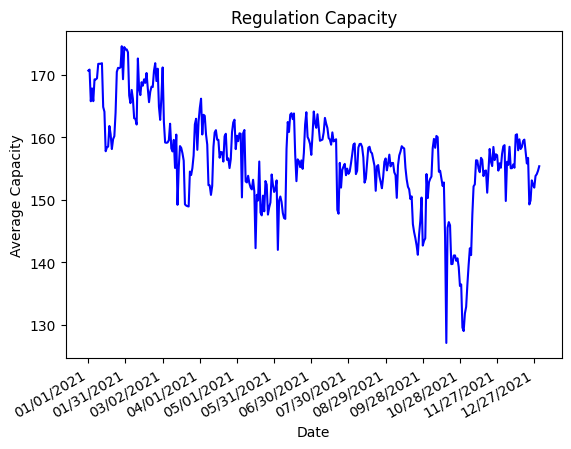

In [5]:
capacity_list_avg = data[['Day', 'Capacity']].groupby('Day').agg('mean') / 12

fig, ax = plt.subplots()
ax.plot(capacity_list_avg, color='b')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Average Capacity')
plt.title('Regulation Capacity')
plt.show()

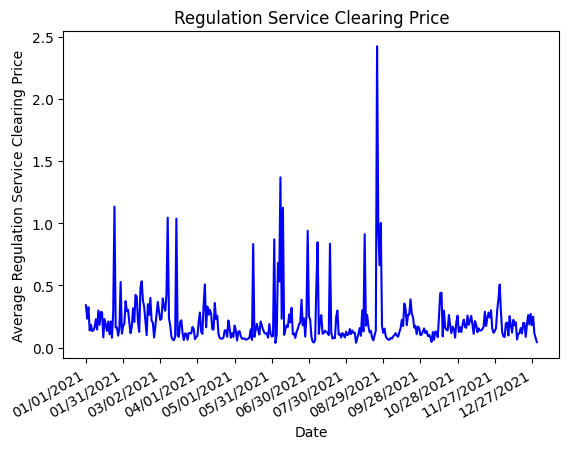

In [6]:
service_price_list_avg = data[['Day', 'Regulation Service Clearing Price']].groupby('Day').agg('mean')

fig, ax = plt.subplots()
ax.plot(service_price_list_avg, color='b')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Average Regulation Service Clearing Price')
plt.title('Regulation Service Clearing Price')
plt.show()


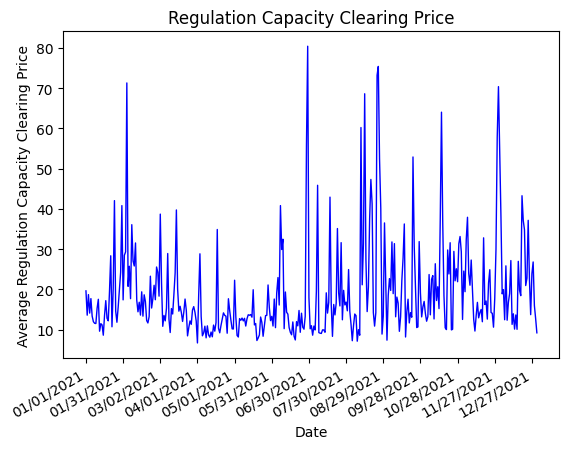

In [7]:
capacity_price_list_avg = data[['Day', 'Regulation Capacity Clearing Price']].groupby('Day').agg('mean')

fig, ax = plt.subplots()
ax.plot(capacity_price_list_avg, color='b', linewidth=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Average Regulation Capacity Clearing Price')
plt.title('Regulation Capacity Clearing Price')
plt.show()


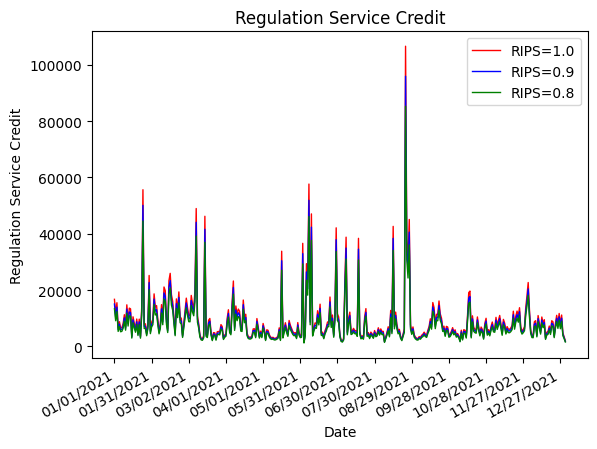

In [8]:
data['Regulation Service Credit with RIPS=1.0'] = data['Capacity'] * data['Regulation Service Clearing Price'] * data['RIPS_1.0']
data['Regulation Service Credit with RIPS=0.9'] = data['Capacity'] * data['Regulation Service Clearing Price'] * data['RIPS_0.9']
data['Regulation Service Credit with RIPS=0.8'] = data['Capacity'] * data['Regulation Service Clearing Price'] * data['RIPS_0.8']

service_credit_08 = data[['Day', 'Regulation Service Credit with RIPS=0.8']].groupby('Day').agg('sum')
service_credit_09 = data[['Day', 'Regulation Service Credit with RIPS=0.9']].groupby('Day').agg('sum')
service_credit_10 = data[['Day', 'Regulation Service Credit with RIPS=1.0']].groupby('Day').agg('sum')

fig, ax = plt.subplots()
ax.plot(service_credit_10, color='red', linewidth=1, label='RIPS=1.0')
ax.plot(service_credit_09, color='blue', linewidth=1, label='RIPS=0.9')
ax.plot(service_credit_08, color='green', linewidth=1, label='RIPS=0.8')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Regulation Service Credit')
plt.title('Regulation Service Credit')
plt.legend()
plt.show()


In [9]:
data['Capacity']

0       2051.80
1       2051.80
2       2051.80
3       2051.80
4       2050.35
         ...   
8755    1823.80
8756    2072.45
8757    2026.65
8758    1625.65
8759    1704.25
Name: Capacity, Length: 8760, dtype: float64

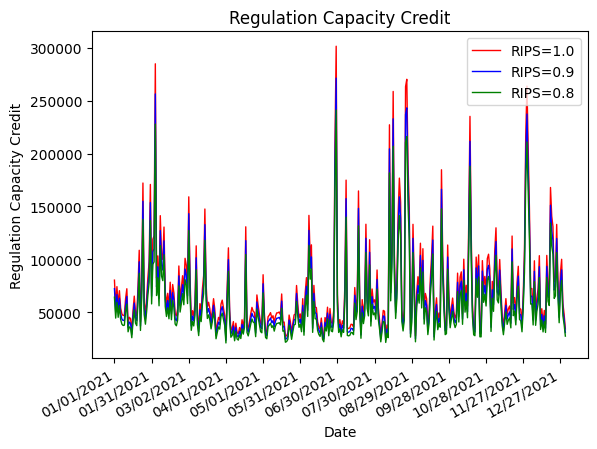

In [10]:
data['Regulation Capacity Credit with RIPS=1.0'] = data['Capacity'] * data['Regulation Capacity Clearing Price'] * data['RIPS_1.0'] * data['Minutes of regulation'] / 12
data['Regulation Capacity Credit with RIPS=0.9'] = data['Capacity'] * data['Regulation Capacity Clearing Price'] * data['RIPS_0.9'] * data['Minutes of regulation'] / 12
data['Regulation Capacity Credit with RIPS=0.8'] = data['Capacity'] * data['Regulation Capacity Clearing Price'] * data['RIPS_0.8'] * data['Minutes of regulation'] / 12

capacity_credit_08 = data[['Day', 'Regulation Capacity Credit with RIPS=0.8']].groupby('Day').agg('sum')
capacity_credit_09 = data[['Day', 'Regulation Capacity Credit with RIPS=0.9']].groupby('Day').agg('sum')
capacity_credit_10 = data[['Day', 'Regulation Capacity Credit with RIPS=1.0']].groupby('Day').agg('sum')

fig, ax = plt.subplots()
ax.plot(capacity_credit_10, color='red', linewidth=1, label='RIPS=1.0')
ax.plot(capacity_credit_09, color='blue', linewidth=1, label='RIPS=0.9')
ax.plot(capacity_credit_08, color='green', linewidth=1, label='RIPS=0.8')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Regulation Capacity Credit')
plt.title('Regulation Capacity Credit')
plt.legend()
plt.show()

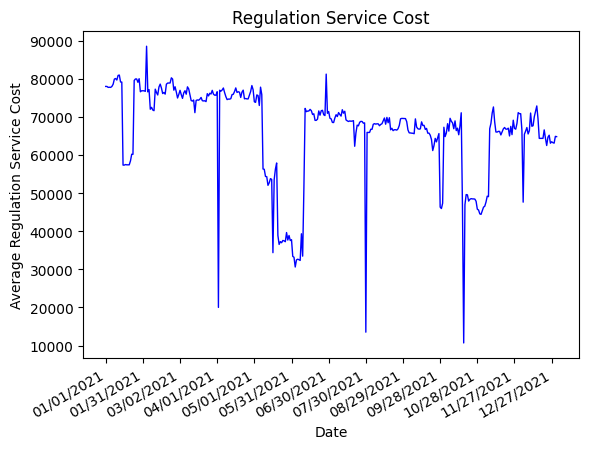

In [11]:
data['Regulation Service Cost'] = data['Service Cost']

service_cost = data[['Day', 'Regulation Service Cost']].groupby('Day').agg('sum')

fig, ax = plt.subplots()
ax.plot(service_cost, color='blue', linewidth=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Average Regulation Service Cost')
plt.title('Regulation Service Cost')
plt.show()


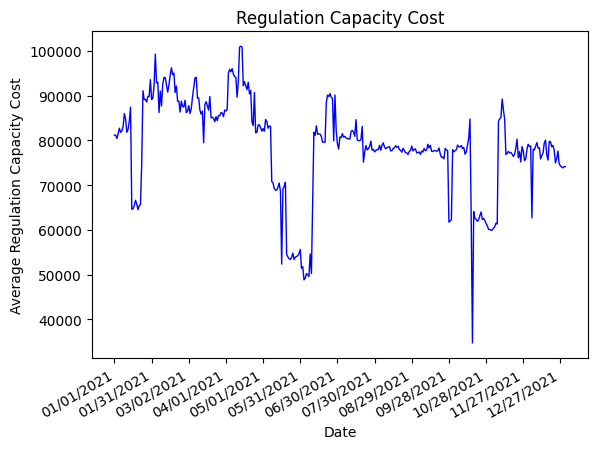

In [12]:
data['Regulation Capacity Cost'] = data['Capacity Cost'] * data['Minutes of regulation'] / 12

capacity_cost = data[['Day', 'Regulation Capacity Cost']].groupby('Day').agg('sum')

fig, ax = plt.subplots()
ax.plot(capacity_cost, color='blue', linewidth=1, label='RIPS=1.0')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Average Regulation Capacity Cost')
plt.title('Regulation Capacity Cost')
plt.show()

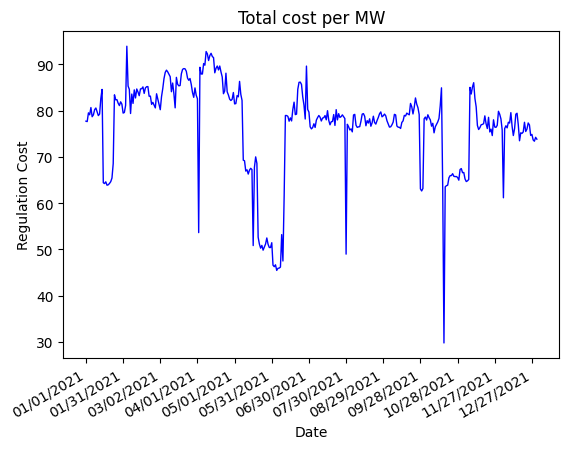

In [14]:
data['Total cost per MW'] = (data['Regulation Service Cost'] + data['Regulation Capacity Cost']) / data['Capacity']
data['Total cost'] = data['Regulation Service Cost'] + data['Regulation Capacity Cost']
total_cost_10 = data[['Day', 'Total cost per MW']].groupby('Day').agg('sum')

fig, ax = plt.subplots()
ax.plot(total_cost_10, color='blue', linewidth=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Regulation Cost')
plt.title('Total cost per MW')
plt.show()

In [37]:
data['Total cost']

0       6551.685833
1       6551.685833
2       6551.685833
3       6551.685833
4       6551.685833
           ...     
8755    6125.964167
8756    6627.075833
8757    6560.100000
8758    4900.468333
8759    3557.448333
Name: Total cost, Length: 8760, dtype: float64

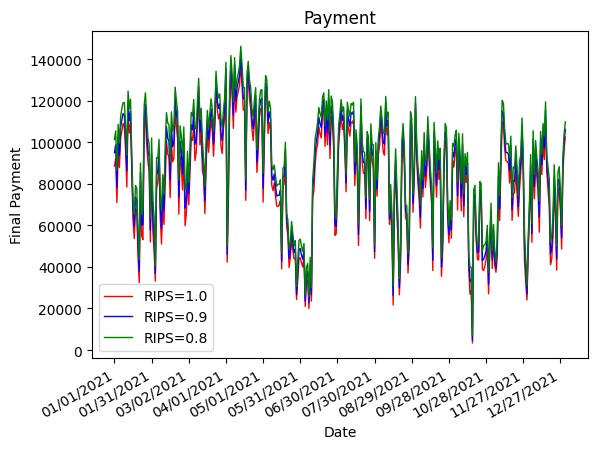

In [15]:
data['payment with RIPS=1.0'] = data['Regulation Capacity Cost'] + data['Regulation Service Cost'] - data['Regulation Capacity Credit with RIPS=1.0'] - data['Regulation Service Credit with RIPS=1.0']
data['payment with RIPS=0.9'] = data['Regulation Capacity Cost'] + data['Regulation Service Cost'] - data['Regulation Capacity Credit with RIPS=0.9'] - data['Regulation Service Credit with RIPS=0.9']
data['payment with RIPS=0.8'] = data['Regulation Capacity Cost'] + data['Regulation Service Cost'] - data['Regulation Capacity Credit with RIPS=0.8'] - data['Regulation Service Credit with RIPS=0.8']

data.loc[data['payment with RIPS=1.0']<0, 'payment with RIPS=1.0'] = 0
data.loc[data['payment with RIPS=0.9']<0, 'payment with RIPS=0.9'] = 0
data.loc[data['payment with RIPS=0.8']<0, 'payment with RIPS=0.8'] = 0

payment_08 = data[['Day', 'payment with RIPS=0.8']].groupby('Day').agg('sum')
payment_09 = data[['Day', 'payment with RIPS=0.9']].groupby('Day').agg('sum')
payment_10 = data[['Day', 'payment with RIPS=1.0']].groupby('Day').agg('sum')

fig, ax = plt.subplots()
ax.plot(payment_10, color='red', linewidth=1, label='RIPS=1.0')
ax.plot(payment_09, color='blue', linewidth=1, label='RIPS=0.9')
ax.plot(payment_08, color='green', linewidth=1, label='RIPS=0.8')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
fig.autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Final Payment')
plt.title('Payment')
plt.legend()
plt.show()

In [16]:
data['Capacity'] = data['Capacity'] / 12
data.to_csv("result.csv")

In [17]:
data

,Day,Capacity,Service Cost,Capacity Cost,Hour,Regulation Service Clearing Price,Regulation Capacity Clearing Price,RIPS_1.0,RIPS_0.9,RIPS_0.8,...,Regulation Capacity Credit with RIPS=1.0,Regulation Capacity Credit with RIPS=0.9,Regulation Capacity Credit with RIPS=0.8,Regulation Service Cost,Regulation Capacity Cost,Total cost per MW,Total cost,payment with RIPS=1.0,payment with RIPS=0.9,payment with RIPS=0.8
0,01/01/2021,170.983333,3175.39,40515.55,1,0.205000,8.200000,1.0,0.9,0.8,...,1402.063333,1261.857000,1121.650667,3175.39,3376.295833,3.193141,6551.685833,4729.003500,4911.271733,5093.539967
1,01/01/2021,170.983333,3175.39,40515.55,2,0.703333,184.858333,1.0,0.9,0.8,...,31607.694028,28446.924625,25286.155222,3175.39,3376.295833,3.193141,6551.685833,0.000000,0.000000,0.000000
2,01/01/2021,170.983333,3175.39,40515.55,3,0.166667,24.508333,1.0,0.9,0.8,...,4190.516528,3771.464875,3352.413222,3175.39,3376.295833,3.193141,6551.685833,2019.202639,2472.450958,2925.699278
3,01/01/2021,170.983333,3175.39,40515.55,4,0.050000,9.161667,1.0,0.9,0.8,...,1566.492306,1409.843075,1253.193844,3175.39,3376.295833,3.193141,6551.685833,4882.603528,5049.511758,5216.419989
4,01/01/2021,170.862500,3175.39,40515.55,5,0.050000,8.580000,1.0,0.9,0.8,...,1466.000250,1319.400225,1172.800200,3175.39,3376.295833,3.195399,6551.685833,4983.168083,5140.019858,5296.871633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2021,151.983333,2924.48,38417.81,20,0.010000,11.625000,1.0,0.9,0.8,...,1766.806250,1590.125625,1413.445000,2924.48,3201.484167,3.358901,6125.964167,4340.919917,4519.424342,4697.928767
8756,12/31/2021,172.704167,3126.00,42012.91,21,0.043333,7.526667,1.0,0.9,0.8,...,1299.886694,1169.898025,1039.909356,3126.00,3501.075833,3.197701,6627.075833,5237.382972,5376.352258,5515.321544
8757,12/31/2021,168.887500,3126.13,41207.64,22,0.050000,7.171667,1.0,0.9,0.8,...,1211.204854,1090.084369,968.963883,3126.13,3433.970000,3.236918,6560.100000,5247.562646,5378.816381,5510.070117
8758,12/31/2021,135.470833,2294.44,31272.34,23,0.166667,6.210000,1.0,0.9,0.8,...,841.273875,757.146487,673.019100,2294.44,2606.028333,3.014467,4900.468333,3788.252792,3899.474346,4010.695900


In [18]:
data['payment with RIPS=1.0'].sum()

29720105.97609375

In [19]:
data['payment with RIPS=0.9'].sum()

31499977.155410416

In [20]:
data['payment with RIPS=0.8'].sum()

33373563.353138886

In [21]:
data['Regulation Capacity Credit with RIPS=0.8'].sum() + data['Regulation Service Credit with RIPS=0.8'].sum()

23793877.709736113

In [22]:
data['Regulation Capacity Credit with RIPS=0.9'].sum() + data['Regulation Service Credit with RIPS=0.9'].sum()

26768112.423453126

In [23]:
data['Regulation Capacity Credit with RIPS=1.0'].sum() + data['Regulation Service Credit with RIPS=1.0'].sum()

29742347.137170143

In [24]:
data['Regulation Service Cost'].sum() + data['Regulation Capacity Cost'].sum()

52837383.156666666

In [30]:
(data['Regulation Capacity Credit with RIPS=0.8'].sum() + data['Regulation Service Credit with RIPS=0.8'].sum()) / (data['Regulation Service Cost'].sum() + data['Regulation Capacity Cost'].sum())

0.45032278830284883

In [31]:
(data['Regulation Capacity Credit with RIPS=0.9'].sum() + data['Regulation Service Credit with RIPS=0.9'].sum()) / (data['Regulation Service Cost'].sum() + data['Regulation Capacity Cost'].sum())

0.5066131368407049

In [32]:
(data['Regulation Capacity Credit with RIPS=1.0'].sum() + data['Regulation Service Credit with RIPS=1.0'].sum()) / (data['Regulation Service Cost'].sum() + data['Regulation Capacity Cost'].sum())

0.562903485378561

In [50]:
service_credit_08.sum()

Regulation Service Credit with RIPS=0.8    2.797156e+06
dtype: float64

In [49]:
capacity_cost.sum()

Regulation Capacity Cost    2.868107e+07
dtype: float64